In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageChops
import math, operator

In [2]:
im1 = Image.open('./images/img1.jpg')

In [4]:
im1_Resize_PIL = im1.resize((500,500))

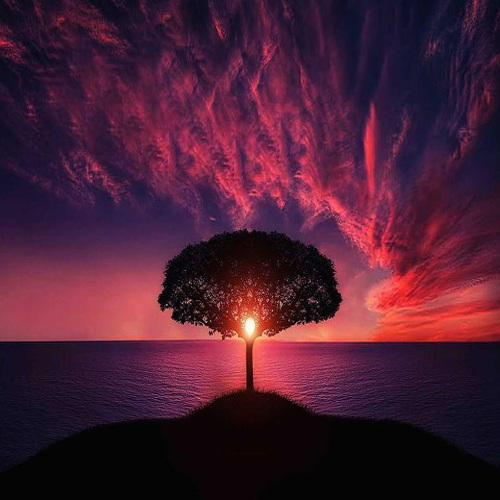

In [5]:
im1_Resize_PIL

In [6]:
im2 = cv2.imread('./images/img1.jpg')

In [7]:
im2_Resize_cv2= cv2.resize(im2,(300,300))

In [8]:
cv2.imshow('img',im2_Resize_cv2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
def calculate_Ratio(size,h,w):
    return (size[0]/w , size[1]/h)


def resizeNN(img, size):
    h = img.shape[0]
    w = img.shape[1]
    wRatio, hRatio = calculate_Ratio(size,h,w)

    resized_img = np.zeros(size + (img.shape[2],), dtype=np.uint8)
    
    
    for i in range(size[1]):
        for j in range(size[0]):
            x = int(i / hRatio)
            y = int(j / wRatio)
            resized_img[i, j] = img[int(i/hRatio), int(j/wRatio)]

    return resized_img
    
    

In [10]:
userResize = resizeNN(im2,(300,300))

In [11]:
cv2.imshow('img',userResize)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
def rmse(image1, image2):
    # Ensure that the images have the same shape
    assert image1.shape == image2.shape, "Images must have the same shape"
    # Calculate the mean squared error between the images
    mse = np.mean((image1 - image2) ** 2)
    # Take the square root of the mean squared error to get the root mean squared error
    rmse = np.sqrt(mse)
    return rmse

In [13]:
rmse(im2_Resize_cv2,userResize)

5.148216879370666

Text(0.5, 1.0, 'Resize (part b)')

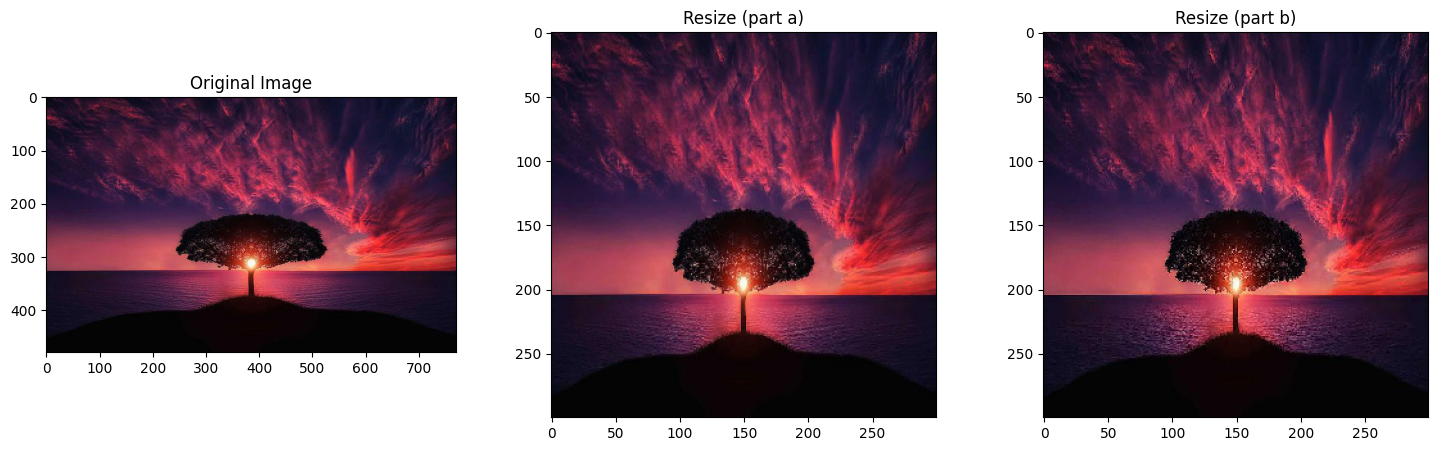

In [14]:
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(im2[...,::-1]); plt.title('Original Image')
plt.subplot(132); plt.imshow(im2_Resize_cv2[...,::-1]); plt.title('Resize (part a)')
plt.subplot(133); plt.imshow(userResize[...,::-1]); plt.title('Resize (part b)')